# Preprocessing 

In [1]:
import pandas as pd
import numpy as np
import random 
import seaborn as sn
import matplotlib.pyplot as plt
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lecnd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
skip = sorted(random.sample(range(1,200000),200000-45000))
dataset = pd.read_csv('imdb_master.csv',encoding = 'ISO-8859-1',skiprows=skip)
dataset.head(10)

,Unnamed: 0,type,review,label,file
0,3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt
1,6,test,This German horror film has to be one of the w...,neg,10005_2.txt
2,10,test,Cage plays a drunk and gets high critically pr...,neg,10009_3.txt
3,15,test,Here's a decidedly average Italian post apocal...,neg,10013_4.txt
4,22,test,I'm a huge fan of both Emily Watson (Breaking ...,neg,1001_4.txt
5,24,test,I think that would have been a more appropriat...,neg,10021_3.txt
6,35,test,All the criticisms of this movie are quite val...,neg,10031_2.txt
7,38,test,I saw this movie with my girlfriend. It was a ...,neg,10034_1.txt
8,47,test,I love ghost stories and I will sit through a ...,neg,10042_1.txt
9,50,test,I saw this movie yesterday and thought it was ...,neg,10045_1.txt


In [22]:
list(dataset)

['Unnamed: 0', 'type', 'review', 'label', 'file']

In [23]:
dataset.shape

(22586, 5)

We will be doing our own train/test split, therefore we won't be using hte `type` column. The column `file` won't be of any use for now.

In [24]:
dataset = dataset.drop(['Unnamed: 0', 'type', 'file'], axis=1)

In [25]:
dataset = dataset[dataset['review'].isnull()==False]

<AxesSubplot:xlabel='label', ylabel='count'>

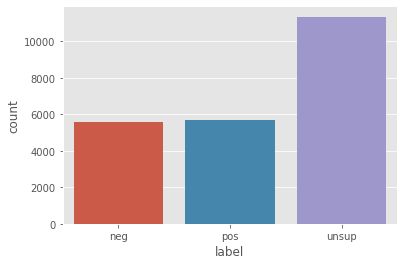

In [26]:
plt.style.use('ggplot')
sn.countplot(x=dataset['label'])

The dataset is perfectly balanced. The number of positive reviews is identical to the number of negative reviews. There is also the same number of unlabled reviews as there is labeled reviews.

In [27]:
dataset['review'][0]

"Not even the Beatles could write songs everyone liked, and although Walter Hill is no mop-top he's second to none when it comes to thought provoking action movies. The nineties came and social platforms were changing in music and film, the emergence of the Rapper turned movie star was in full swing, the acting took a back seat to each man's overpowering regional accent and transparent acting. This was one of the many ice-t movies i saw as a kid and loved, only to watch them later and cringe. Bill Paxton and William Sadler are firemen with basic lives until a burning building tenant about to go up in flames hands over a map with gold implications. I hand it to Walter for quickly and neatly setting up the main characters and location. But i fault everyone involved for turning out Lame-o performances. Ice-t and cube must have been red hot at this time, and while I've enjoyed both their careers as rappers, in my opinion they fell flat in this movie. It's about ninety minutes of one guy ri

In [28]:
def clean_review(review):
    review = review.replace('<br /><br />',' ')
    review = re.sub(r'https?:\/\/.*[\r\n]*', '', review)
    review = re.sub('[^a-zA-Z]',' ', review)
    review = re.sub(r'#', '', review)
    review_words = review.lower().split()
    review_words = [word for word in review_words if word not in stopwords.words('english')]

    list_words=[]
    stemmer = nltk.stem.SnowballStemmer('english')
    for word in review_words:
        list_words.append(stemmer.stem(word))  # leaves only the stem word
    return(list_words)

In [29]:
def get_freqs(reviews, labels):
    label_list = np.squeeze(labels).tolist()
    reviews_list = reviews.tolist()
    freqs = {}

    for label, review in zip(label_list, reviews):
        for word in review:
            pair = (word, label)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1
    return freqs

In [30]:
dataset['review'][0]

"Not even the Beatles could write songs everyone liked, and although Walter Hill is no mop-top he's second to none when it comes to thought provoking action movies. The nineties came and social platforms were changing in music and film, the emergence of the Rapper turned movie star was in full swing, the acting took a back seat to each man's overpowering regional accent and transparent acting. This was one of the many ice-t movies i saw as a kid and loved, only to watch them later and cringe. Bill Paxton and William Sadler are firemen with basic lives until a burning building tenant about to go up in flames hands over a map with gold implications. I hand it to Walter for quickly and neatly setting up the main characters and location. But i fault everyone involved for turning out Lame-o performances. Ice-t and cube must have been red hot at this time, and while I've enjoyed both their careers as rappers, in my opinion they fell flat in this movie. It's about ninety minutes of one guy ri

In [31]:
print(clean_review(dataset['review'][0]))

['even', 'beatl', 'could', 'write', 'song', 'everyon', 'like', 'although', 'walter', 'hill', 'mop', 'top', 'second', 'none', 'come', 'thought', 'provok', 'action', 'movi', 'nineti', 'came', 'social', 'platform', 'chang', 'music', 'film', 'emerg', 'rapper', 'turn', 'movi', 'star', 'full', 'swing', 'act', 'took', 'back', 'seat', 'man', 'overpow', 'region', 'accent', 'transpar', 'act', 'one', 'mani', 'ice', 'movi', 'saw', 'kid', 'love', 'watch', 'later', 'cring', 'bill', 'paxton', 'william', 'sadler', 'firemen', 'basic', 'live', 'burn', 'build', 'tenant', 'go', 'flame', 'hand', 'map', 'gold', 'implic', 'hand', 'walter', 'quick', 'neat', 'set', 'main', 'charact', 'locat', 'fault', 'everyon', 'involv', 'turn', 'lame', 'perform', 'ice', 'cube', 'must', 'red', 'hot', 'time', 'enjoy', 'career', 'rapper', 'opinion', 'fell', 'flat', 'movi', 'nineti', 'minut', 'one', 'guy', 'ridicul', 'turn', 'back', 'guy', 'point', 'find', 'lock', 'multipl', 'state', 'disbelief', 'movi', 'documentari', 'wont', '

## Shaping and Stemming

In [32]:
dataset['clean_review'] = dataset['review'].apply(lambda x: clean_review(x))

In [33]:
dataset['join_clean_review'] = dataset['clean_review'].apply(lambda x: ' '.join(x))

## Final dataset

In [34]:
dataset.head()

,review,label,clean_review,join_clean_review
0,Not even the Beatles could write songs everyon...,neg,"[even, beatl, could, write, song, everyon, lik...",even beatl could write song everyon like altho...
1,This German horror film has to be one of the w...,neg,"[german, horror, film, one, weirdest, seen, aw...",german horror film one weirdest seen awar conn...
2,Cage plays a drunk and gets high critically pr...,neg,"[cage, play, drunk, get, high, critic, prais, ...",cage play drunk get high critic prais elizabet...
3,Here's a decidedly average Italian post apocal...,neg,"[decid, averag, italian, post, apocalypt, take...",decid averag italian post apocalypt take hunt ...
4,I'm a huge fan of both Emily Watson (Breaking ...,neg,"[huge, fan, emili, watson, break, wave, tom, w...",huge fan emili watson break wave tom wilkinson...


We want to seperate the dataset into two other datasets. One, with labeled reviews, will be used for supervised learning algorithms and the other one for unsupervised learning algorithms.

In [41]:
dataset_unsup = dataset[dataset['label']=='unsup']
dataset_sup = dataset[dataset['label']!='unsup']
dataset_sup['label'].replace(['neg', 'pos'], [0, 1], inplace=True)

C:\Users\lecnd\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\series.py:4479: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


# Processed dataset for unsupervised learning algorithms

In [42]:
dataset_unsup

,review,label,clean_review,join_clean_review
11230,Doris Day was an icon of beauty in singing and...,unsup,"[dori, day, icon, beauti, sing, act, warm, voi...",dori day icon beauti sing act warm voic genius...
11231,LOVE ME OR LEAVE ME is not your typical musica...,unsup,"[love, leav, typic, music, one, break, song, d...",love leav typic music one break song danc numb...
11232,Curiously enough after I viewed my VHS copy of...,unsup,"[curious, enough, view, vhs, copi, love, leav,...",curious enough view vhs copi love leav went mo...
11233,Love Me Or Leave Me (1955) is perhaps Doris Da...,unsup,"[love, leav, perhap, dori, day, finest, hour, ...",love leav perhap dori day finest hour around p...
11234,The immense talent of Meryl Streep and some am...,unsup,"[immens, talent, meryl, streep, amaz, bodi, sp...",immens talent meryl streep amaz bodi special e...
...,...,...,...,...
22581,And then filmed during each actors day off at ...,unsup,"[film, actor, day, actual, pay, job, wonder, a...",film actor day actual pay job wonder actor cop...
22582,One of the funnier MST3K experiments. This was...,unsup,"[one, funnier, mst, k, experi, ambiti, film, l...",one funnier mst k experi ambiti film light yea...
22583,Time Chasers is probably one of the better mov...,unsup,"[time, chaser, probabl, one, better, movi, mst...",time chaser probabl one better movi mst k thou...
22584,... to dull the incredible pain this stinkmast...,unsup,"[dull, incred, pain, stinkmast, caus, realli, ...",dull incred pain stinkmast caus realli feel so...


# Processed dataset for supervised learning algorithms

In [43]:
dataset_sup

,review,label,clean_review,join_clean_review
0,Not even the Beatles could write songs everyon...,0,"[even, beatl, could, write, song, everyon, lik...",even beatl could write song everyon like altho...
1,This German horror film has to be one of the w...,0,"[german, horror, film, one, weirdest, seen, aw...",german horror film one weirdest seen awar conn...
2,Cage plays a drunk and gets high critically pr...,0,"[cage, play, drunk, get, high, critic, prais, ...",cage play drunk get high critic prais elizabet...
3,Here's a decidedly average Italian post apocal...,0,"[decid, averag, italian, post, apocalypt, take...",decid averag italian post apocalypt take hunt ...
4,I'm a huge fan of both Emily Watson (Breaking ...,0,"[huge, fan, emili, watson, break, wave, tom, w...",huge fan emili watson break wave tom wilkinson...
...,...,...,...,...
11225,I saw this movie last night after waiting ages...,1,"[saw, movi, last, night, wait, age, age, relea...",saw movi last night wait age age releas canada...
11226,I was very moved by the story and because I am...,1,"[move, stori, go, someth, similar, parent, rea...",move stori go someth similar parent realli con...
11227,This is a really interesting movie. It is an a...,1,"[realli, interest, movi, action, movi, comedi,...",realli interest movi action movi comedi mix fo...
11228,This is the kind of film you want to see with ...,1,"[kind, film, want, see, glass, wine, fire, fee...",kind film want see glass wine fire feet requir...


# Frequencies of stem words

We previously created a function called `get_freqs` that returns the frequenty of each word given a certain label (0 or 1).  

In [46]:
frequencies = get_freqs(dataset_sup[('clean_review')], dataset_sup['label'])

In [47]:
print(frequencies)

{('even', 0): 3471, ('beatl', 0): 11, ('could', 0): 2063, ('write', 0): 560, ('song', 0): 342, ('everyon', 0): 450, ('like', 0): 5411, ('although', 0): 484, ('walter', 0): 34, ('hill', 0): 78, ('mop', 0): 5, ('top', 0): 369, ('second', 0): 556, ('none', 0): 260, ('come', 0): 1471, ('thought', 0): 899, ('provok', 0): 35, ('action', 0): 774, ('movi', 0): 12940, ('nineti', 0): 23, ('came', 0): 329, ('social', 0): 82, ('platform', 0): 12, ('chang', 0): 424, ('music', 0): 734, ('film', 0): 9829, ('emerg', 0): 38, ('rapper', 0): 11, ('turn', 0): 930, ('star', 0): 897, ('full', 0): 318, ('swing', 0): 28, ('act', 0): 2322, ('took', 0): 255, ('back', 0): 1138, ('seat', 0): 44, ('man', 0): 1053, ('overpow', 0): 5, ('region', 0): 21, ('accent', 0): 221, ('transpar', 0): 11, ('one', 0): 6004, ('mani', 0): 1244, ('ice', 0): 54, ('saw', 0): 648, ('kid', 0): 800, ('love', 0): 1203, ('watch', 0): 3385, ('later', 0): 393, ('cring', 0): 67, ('bill', 0): 154, ('paxton', 0): 10, ('william', 0): 164, ('sad

# Save the clean datasets to use for next steps

In [44]:
dataset_sup.to_csv('imdb_sup_clean.csv', index=False)
dataset_unsup.to_csv('imdb_unsup_clean.csv', index=False)  
dataset.to_csv('imdb_clean.csv', index=False)  